In [1]:
from statistics import mean
import cv2
import numpy as np
from numpy import ndarray
from typing import List
import matplotlib.pyplot as plt
from aipose.filters import apply_gamma_correction
from aipose.models.yolov7.domain import YoloV7Pose, YoloV7PoseKeypoints
from aipose.plot import plot

In [2]:
original_image: ndarray = cv2.imread("./../person.jpg")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
model = YoloV7Pose()

Using cache found in /home/user/.cache/torch/hub/WongKinYiu_yolov7_main

                 from  n    params  module                                  arguments                     
  0                -1  1         0  models.common.ReOrg                     []                            
  1                -1  1      7040  models.common.Conv                      [12, 64, 3, 1]                
  2                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  3                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  4                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                 

In [3]:
image_normalized = original_image / 255.0
corrected_image = apply_gamma_correction(original_image)

In [4]:
img_yolo_v7_keypoints: List[YoloV7PoseKeypoints] = model(image_normalized)
image_yolo_v7_keypoints: List[YoloV7PoseKeypoints] = model(original_image)
corrected_image_yolo_v7_keypoints: List[YoloV7PoseKeypoints] = model(corrected_image)

/aipose/.venv/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
image_normalized_mean = mean([i.body_keypoints[-1] for i in img_yolo_v7_keypoints])
original_image_mean = mean([i.body_keypoints[-1] for i in image_yolo_v7_keypoints])
corrected_image_mean = mean(
    [i.body_keypoints[-1] for i in corrected_image_yolo_v7_keypoints]
)

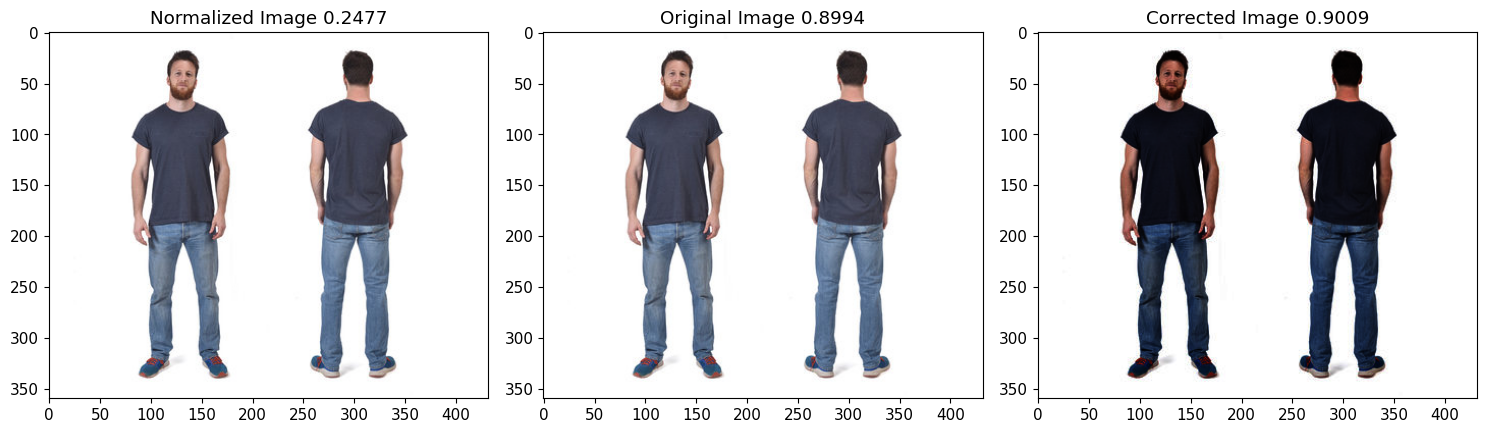

In [6]:
%matplotlib inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_normalized)
plt.title(f"Normalized Image {round(image_normalized_mean, 4)}")

plt.subplot(1, 3, 2)
plt.imshow(original_image)
plt.title(f"Original Image {round(original_image_mean, 4)}")

plt.subplot(1, 3, 3)
plt.imshow(corrected_image)
plt.title(f"Corrected Image {round(corrected_image_mean, 4)}")

plt.tight_layout()
plt.show()